In [ ]:
%%javascript
require.config({
    paths: {
        d3: 'https://d3js.org/d3.v5.min'
    }
});

In [ ]:
%%javascript
(function(element) {
    require(['d3'], function(d3) {   
        var data = [1, 2, 4, 8, 16, 8, 4, 2, 1]

        var svg = d3.select(element.get(0)).append('svg')
            .attr('width', 400)
            .attr('height', 200);
        svg.selectAll('circle')
            .data(data)
            .enter()
            .append('circle')
            .attr("cx", function(d, i) {return 40 * (i + 1);})
            .attr("cy", function(d, i) {return 100 + 30 * (i % 3 - 1);})
            .style("fill", "#1570a4")
            .transition().duration(2000)
            .attr("r", function(d) {return 2*d;})
        ;
    })
})(element);

In [1]:
# probability of a given ticket winning
def winProbGet(numWhite = 5, whiteRange = 61, redRange = 31):
    ballCombinations = comb(whiteRange, numWhite) * redRange
    winProb = 1./ballCombinations
    return winProb, ballCombinations

# proability of jackpot given the number of tickets under uniform distribution
def jackpotProbGet(numTickets):
    winProb,_ = winProbGet(5,61,31)
    noWinnerProb =  (1 - winProb) ** numTickets
    return 1 - noWinnerProb

# probability of exactly k jackpots out of n draws, each with numTickets tickets purchased
def jackpotKofN(k, n, numTickets):
    jackpotProb = jackpotProbGet(numTickets)
    return binom.pmf(k,n,jackpotProb)

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


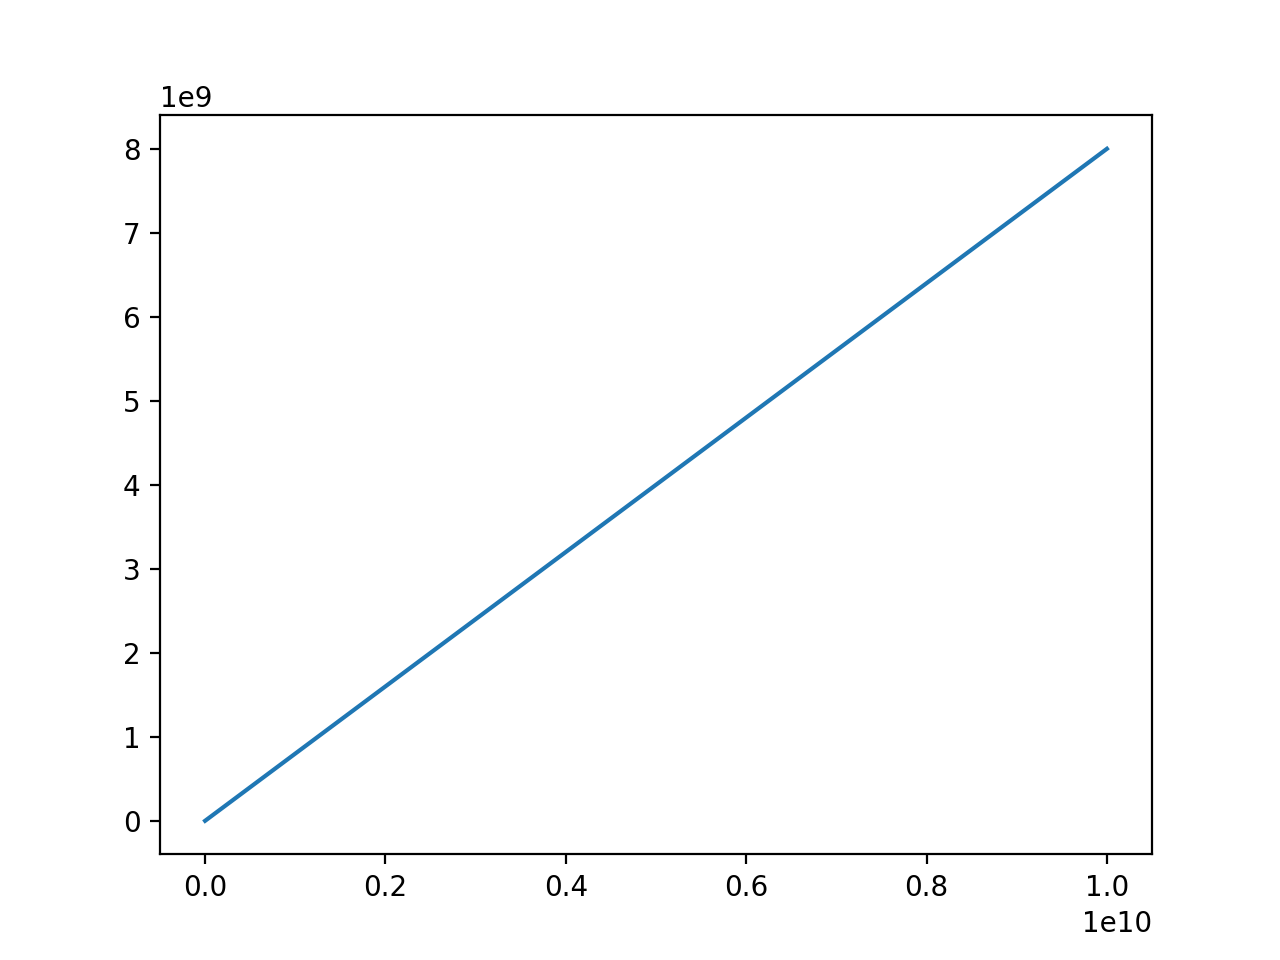

In [13]:
def expectedValueGet(numTickets):
    jackpot = 2 * 10**8
    winProb = 10 ** -9
    winnerProb =  1 - ((1 - winProb) ** numTickets)
    expectedValue = numTickets + (winnerProb * -jackpot)
    #expectedValue = (winnerProb * (numTickets - jackpot)) + ((1 - winnerProb) * numTickets)
    return expectedValue

numTickets = np.linspace(0,10**10,10**6)
expectedValue = [expectedValueGet(i) for i in numTickets]

plt.plot(numTickets, expectedValue)

In [26]:
from decimal import *
getcontext().prec = 40

jackpot = Decimal(10**9)
winProb = Decimal(1./(2**63))
numTickets = Decimal(10**10)
winnerProb =  1 - ((1 - winProb) ** numTickets)
expectedValue = numTickets + (winnerProb * -jackpot)

In [27]:
winProb

Decimal('1.08420217248550443400745280086994171142578125E-19')

In [28]:
winnerProb

Decimal('1.0842021718977572588670432182536E-9')

In [29]:
expectedValue

Decimal('9999999998.915797828102242741132956781746')

In [6]:
clip.resize?

In [14]:
import cv2
import numpy as np
 
cap = cv2.VideoCapture('/Users/mettinger/Desktop/draves-high-fidelity-sample_512kb.mp4')
 
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('/Users/mettinger/Desktop/resize.mp4',fourcc, 25,(480,240))
 
while True:
    ret, frame = cap.read()
    if ret == True:
        b = cv2.resize(frame,(480,240),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)
        out.write(b)
    else:
        break
    
cap.release()
out.release()
cv2.destroyAllWindows()

In [11]:
cv2.VideoWriter?